## CORRELACIÓN Y COVARIANZA

In [17]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (20,20) 
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [10]:
df = pd.read_csv('archivos/coste_de_vida_final.csv', index_col=0)

In [11]:
df

,city,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,3.54,1.91,1.03,1.71,3.77,11.75,0.51,11.39,0.95,2.26,3.70,0.36,28.47,0.37,1.19,59.65,0.02,16.66,34.17,8.54,555.18,24556.21,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.35,9.83,2.27,3.61,4.30,0.25,4.91,0.31,1.35,43.57,0.01,9.33,25.37,4.30,107.07,3682.67,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.36,9.83,1.54,2.49,4.30,0.49,11.67,0.22,1.24,58.07,0.01,7.95,21.20,4.91,74.00,1964.24,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,1.80,1.80,NaN,1.24,NaN,NaN,0.77,NaN,NaN,NaN,NaN,NaN,NaN,1.03,1.01,77.35,NaN,27.46,25.78,7.74,NaN,NaN,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,3.71,2.53,6.86,3.71,11.88,11.44,4.01,14.82,NaN,NaN,14.82,6.30,NaN,NaN,NaN,259.40,0.07,84.00,71.64,10.01,NaN,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


1- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Siempre contando con variables numéricas:

- Covarianza: muestra la dirección de la relación pero no su fuerza (fijarse si es positiva o negativa)

- Correlación: muestra la dirección de la relación y también su fuerza (cuanto más cerca de 1 ó -1 mayor la fuerza de la relación)

2- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [12]:
round(df.cov(),3)

,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality
Meal_Inexpensive_Restaurant,51.223,142.284,13.495,6.007,0.491,5.971,4.883,19.955,26.199,2.664,11.181,2.827,2.664,19.906,5.236,125.737,2.933,1.401,311.832,0.254,-4.464380e+02,57.533,20.346,2195.695,2.720206e+04,2759.586,2344.054,4678.723,3929.591,8.073670e+03,6.531450e+03,7714.666,-14.018,0.154
Mealfor2_Midrange_Restaurant,142.284,651.695,49.534,22.485,2.853,20.581,18.868,75.120,104.946,9.457,44.133,10.726,9.281,72.982,20.808,503.760,11.902,5.597,1122.907,0.974,1.588260e+03,247.134,77.435,7893.643,1.013443e+05,10405.571,8709.780,18484.557,15059.168,3.896762e+04,3.091016e+04,28666.696,-54.771,1.297
McMeal_at_McDonalds,13.495,49.534,7.314,2.133,0.314,1.907,1.947,7.627,11.250,0.870,4.221,0.978,0.919,6.479,1.943,44.630,1.277,0.613,108.783,0.098,9.358640e+02,23.100,7.436,730.135,8.382793e+03,906.809,767.119,1526.654,1276.574,4.271629e+03,3.146841e+03,2694.523,-5.405,0.082
Cappuccino,6.007,22.485,2.133,1.846,0.168,1.359,0.866,3.596,4.671,0.621,3.523,0.660,0.675,3.224,0.919,23.008,0.521,0.115,50.467,0.037,1.623650e+02,10.335,3.922,420.119,5.688718e+03,570.526,477.607,985.939,812.051,1.751907e+03,1.297823e+03,1611.751,-2.271,0.027
Milk_1l,0.491,2.853,0.314,0.168,0.267,0.139,0.183,0.418,0.904,0.072,0.777,0.075,0.122,0.475,0.088,3.311,0.087,0.014,3.846,0.011,1.719730e+02,3.696,0.400,26.443,7.601540e+02,49.908,36.688,113.621,73.595,6.666370e+02,4.224720e+02,94.920,-0.279,0.017
Rice_1kg,5.971,20.581,1.907,1.359,0.139,2.666,0.834,3.948,4.547,0.725,3.215,0.646,0.654,2.697,0.790,19.648,0.499,0.044,49.375,0.044,-8.378900e+01,10.326,3.697,366.888,5.398818e+03,583.696,493.576,1016.805,830.348,1.268505e+03,9.956080e+02,1456.186,-1.725,-0.013
Eggs_12uds,4.883,18.868,1.947,0.866,0.183,0.834,1.164,3.248,4.494,0.361,1.905,0.420,0.382,2.619,0.704,16.977,0.463,0.208,42.860,0.042,2.852970e+02,9.437,2.935,287.570,3.791941e+03,377.373,317.100,660.947,541.413,1.555608e+03,1.185162e+03,1080.011,-2.158,0.038
Chicken_Fillets_1kg,19.955,75.120,7.627,3.596,0.418,3.948,3.248,19.803,21.348,1.583,7.946,1.761,1.529,9.159,2.938,65.690,1.849,0.687,163.515,0.163,3.186440e+02,33.584,11.914,1253.367,1.669655e+04,1604.492,1319.229,2728.518,2273.915,5.987396e+03,4.407473e+03,4601.447,-8.207,0.107
Beef_Round_1kg,26.199,104.946,11.250,4.671,0.904,4.547,4.494,21.348,53.064,1.623,10.357,1.973,1.842,11.938,4.340,102.435,2.922,1.289,236.540,0.227,5.365300e+01,54.375,17.975,1821.973,2.379303e+04,1874.844,1542.471,3364.322,2757.690,9.747199e+03,6.652545e+03,6413.561,-13.929,0.259
Water_1.5l_market,2.664,9.457,0.870,0.621,0.072,0.725,0.361,1.583,1.623,0.461,1.662,0.345,0.338,1.504,0.376,9.557,0.202,0.024,19.177,0.022,8.064800e+01,4.380,1.540,177.020,2.301837e+03,250.396,215.370,430.626,364.600,6.082680e+02,4.878560e+02,674.090,-0.680,-0.000


In [13]:
round(df.corr(),3)

,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality
Meal_Inexpensive_Restaurant,1.000,0.787,0.700,0.633,0.139,0.539,0.664,0.666,0.519,0.569,0.351,0.461,0.329,0.628,0.583,0.514,0.511,0.405,0.539,0.313,-0.009,0.363,0.709,0.641,0.505,0.615,0.658,0.557,0.633,0.190,0.271,0.697,-0.382,0.053
Mealfor2_Midrange_Restaurant,0.787,1.000,0.718,0.655,0.223,0.512,0.692,0.665,0.564,0.559,0.385,0.468,0.316,0.644,0.626,0.556,0.561,0.446,0.537,0.316,0.008,0.425,0.754,0.616,0.499,0.623,0.652,0.590,0.641,0.240,0.338,0.694,-0.404,0.126
McMeal_at_McDonalds,0.700,0.718,1.000,0.586,0.227,0.433,0.670,0.638,0.574,0.482,0.341,0.403,0.300,0.556,0.539,0.461,0.574,0.457,0.485,0.300,0.048,0.378,0.685,0.528,0.390,0.508,0.534,0.457,0.509,0.247,0.322,0.606,-0.380,0.076
Cappuccino,0.633,0.655,0.586,1.000,0.250,0.616,0.614,0.617,0.481,0.683,0.570,0.554,0.432,0.539,0.528,0.481,0.468,0.174,0.450,0.234,0.017,0.335,0.713,0.626,0.542,0.646,0.678,0.594,0.653,0.209,0.275,0.744,-0.321,0.050
Milk_1l,0.139,0.223,0.227,0.250,1.000,0.177,0.340,0.183,0.244,0.211,0.338,0.166,0.208,0.210,0.134,0.190,0.203,0.056,0.090,0.181,0.046,0.323,0.196,0.101,0.185,0.150,0.136,0.186,0.159,0.219,0.245,0.117,-0.107,0.083
Rice_1kg,0.539,0.512,0.433,0.616,0.177,1.000,0.512,0.590,0.402,0.660,0.433,0.485,0.355,0.377,0.400,0.357,0.396,0.057,0.364,0.256,-0.007,0.289,0.553,0.498,0.457,0.570,0.602,0.536,0.589,0.138,0.193,0.608,-0.211,-0.020
Eggs_12uds,0.664,0.692,0.670,0.614,0.340,0.512,1.000,0.686,0.575,0.529,0.391,0.444,0.309,0.547,0.508,0.448,0.517,0.388,0.481,0.328,0.036,0.400,0.668,0.540,0.456,0.547,0.578,0.505,0.555,0.231,0.315,0.633,-0.375,0.086
Chicken_Fillets_1kg,0.666,0.665,0.638,0.617,0.183,0.590,0.686,1.000,0.656,0.564,0.393,0.457,0.295,0.468,0.521,0.424,0.517,0.311,0.448,0.315,0.010,0.342,0.657,0.588,0.494,0.571,0.598,0.517,0.574,0.220,0.292,0.657,-0.347,0.059
Beef_Round_1kg,0.519,0.564,0.574,0.481,0.244,0.402,0.575,0.656,1.000,0.352,0.310,0.299,0.216,0.374,0.451,0.391,0.491,0.352,0.397,0.255,0.219,0.327,0.604,0.488,0.404,0.408,0.427,0.394,0.421,0.214,0.272,0.538,-0.347,0.087
Water_1.5l_market,0.569,0.559,0.482,0.683,0.211,0.660,0.529,0.564,0.352,1.000,0.529,0.608,0.436,0.499,0.441,0.403,0.374,0.073,0.343,0.296,0.016,0.288,0.555,0.543,0.456,0.582,0.619,0.530,0.599,0.152,0.220,0.637,-0.194,-0.001


Tras calcular la covarianza y la relación, y fijarnos en las relaciones con nuestra variable dependiente "Basic", observamos que para casi todas las variables independientes la relación es positiva, es decir, a mayor precio en la variable independiente mayor precio en nuestra variable dependiente, exceptuando dos variables: 

- internet(-0.022): es una relación muy cercana a 0, podría no ser significativa 

In [14]:
df_numericas = df.select_dtypes(include=np.number)

3- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

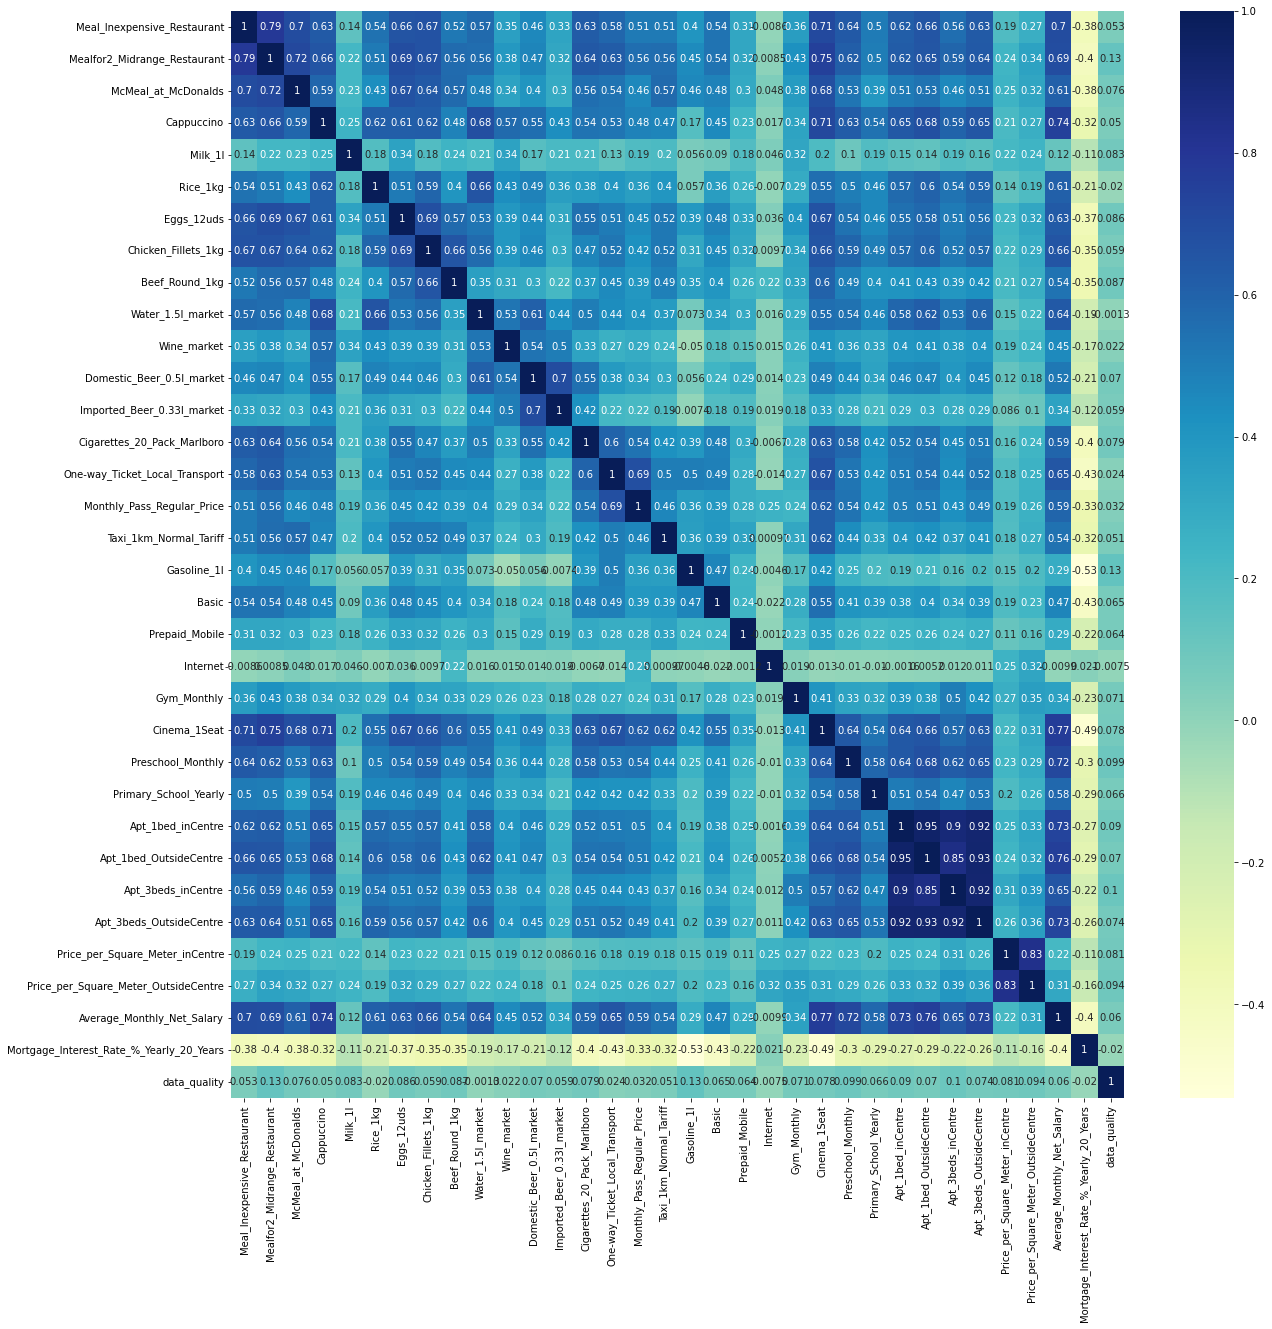

In [18]:
sns.heatmap(df_numericas.corr(),
            cmap = "YlGnBu", 
           annot = True);

4- Guardad la gráfica del heatmap.